(<Axes: >, [<matplotlib.lines.Line2D at 0x7ac2e93bf550>])

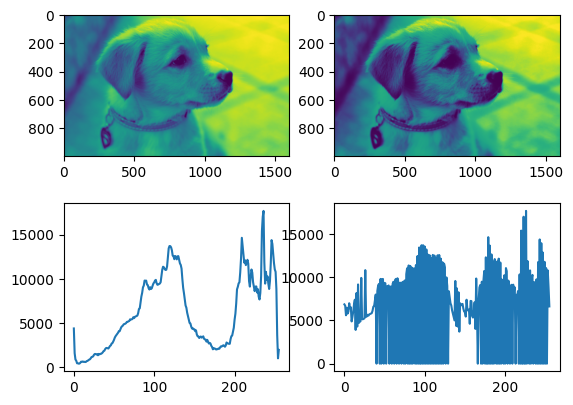

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1=cv2.imread("/content/R.jpg",0)
hist1=cv2.calcHist([image1],[0],None,[256],[0,256])
image2=cv2.equalizeHist(image1)
hist2=cv2.calcHist([image2],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(image1)
plt.subplot(223),plt.plot(hist1)
plt.subplot(222),plt.imshow(image2)
plt.subplot(224),plt.plot(hist2)

(<Axes: >, [<matplotlib.lines.Line2D at 0x7ac2e91348d0>])

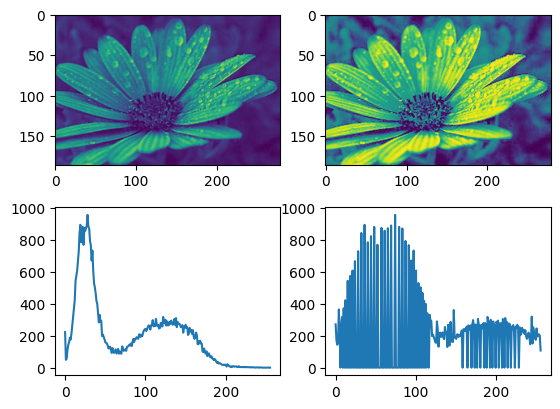

In [ ]:
import cv2
import matplotlib.pyplot as plt
image1=cv2.imread("/content/flower.jpg",0)
hist1=cv2.calcHist([image1],[0],None,[256],[0,256])
image2=cv2.equalizeHist(image1)
hist2=cv2.calcHist([image2],[0],None,[256],[0,256])
plt.subplot(221),plt.imshow(image1)
plt.subplot(223),plt.plot(hist1)
plt.subplot(222),plt.imshow(image2)
plt.subplot(224),plt.plot(hist2)

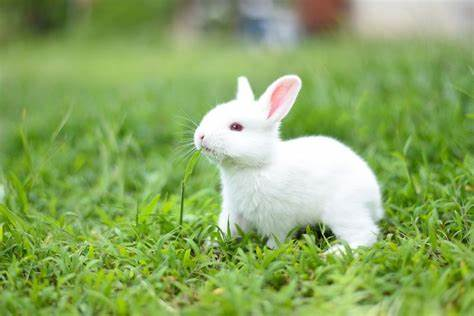

In [ ]:
# exp 2.2
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread("/content/OIP.jpg")
cv2_imshow(img)


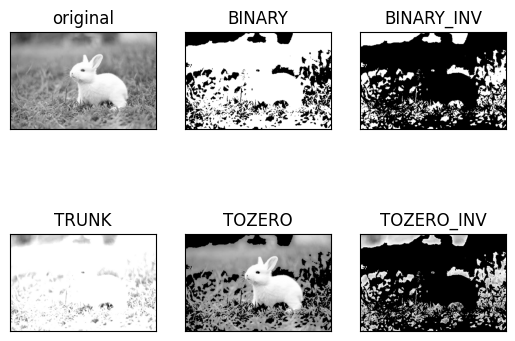

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread("/content/OIP.jpg",cv2.IMREAD_GRAYSCALE)
#cv2_imshow(img)
_,T1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
r,T2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
r,T3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
r,T4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
r,T5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles=['original','BINARY','BINARY_INV','TRUNK','TOZERO','TOZERO_INV']
img=[img,T1,T2,T3,T4,T5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(img[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])


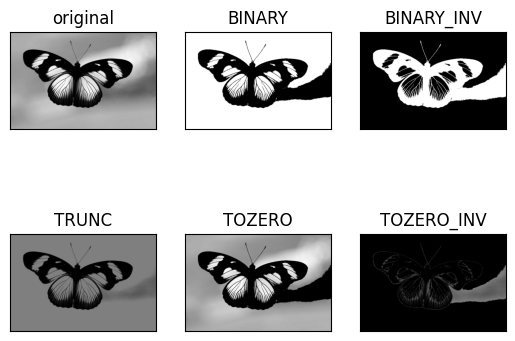

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread("/content/ssss.jpg")
#cv2_imshow(img)
_,T1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
r,T2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
r,T3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
r,T4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
r,T5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles=['original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
img=[img,T1,T2,T3,T4,T5]
for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(img[i])
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])


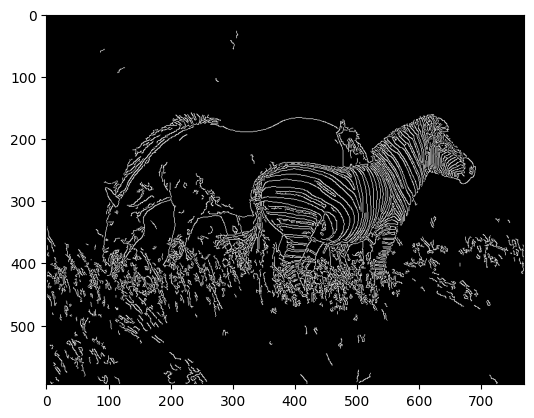

In [ ]:
#exp2.2 edge detection
import cv2
import matplotlib.pyplot as plt
image1=cv2.imread("/content/horsezebra.jpg")
grayimage=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimage,'gray')
edge_detect=cv2.Canny(grayimage,100,200)
plt.imshow(edge_detect,'gray')

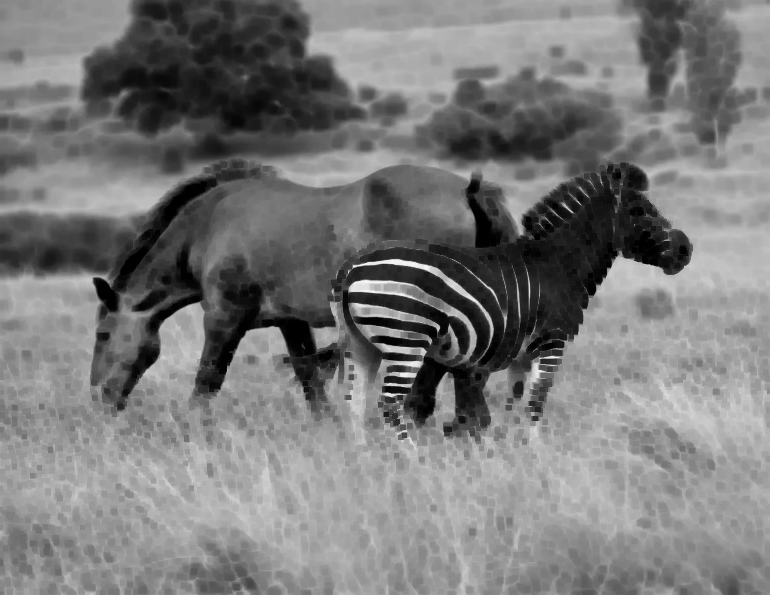

In [ ]:
#2.4 morphological operations
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img21=cv2.imread("/content/horsezebra.jpg")
grayimage1=cv2.cvtColor(img21,cv2.COLOR_BGR2GRAY)
#create the kernel
kernel=np.ones((5,5),np.uint8)
#erision to original image
erosion=cv2.erode(grayimage1,kernel,iterations=1)
cv2_imshow(erosion)
#

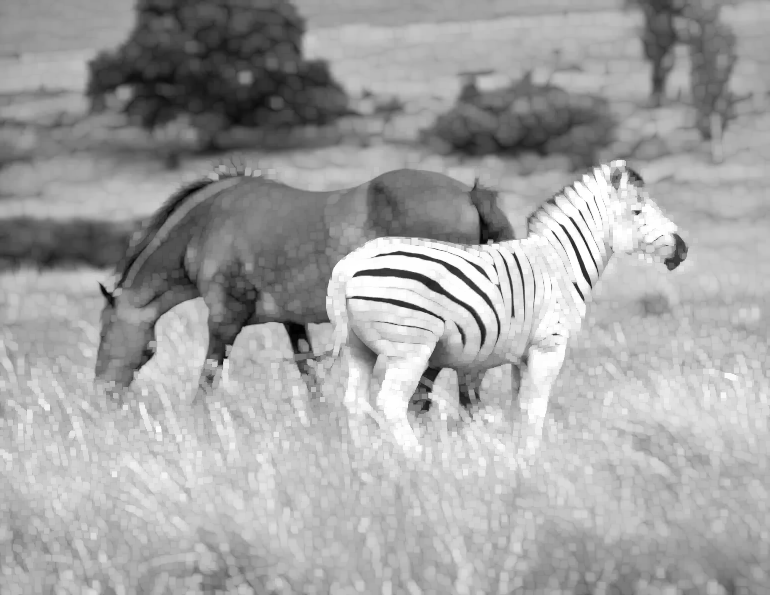

In [ ]:
#dialated image for original image
dialated=cv2.dilate(grayimage1,kernel,iterations=1)
cv2_imshow(dialated)

# exp 2.5 DataAugmentation

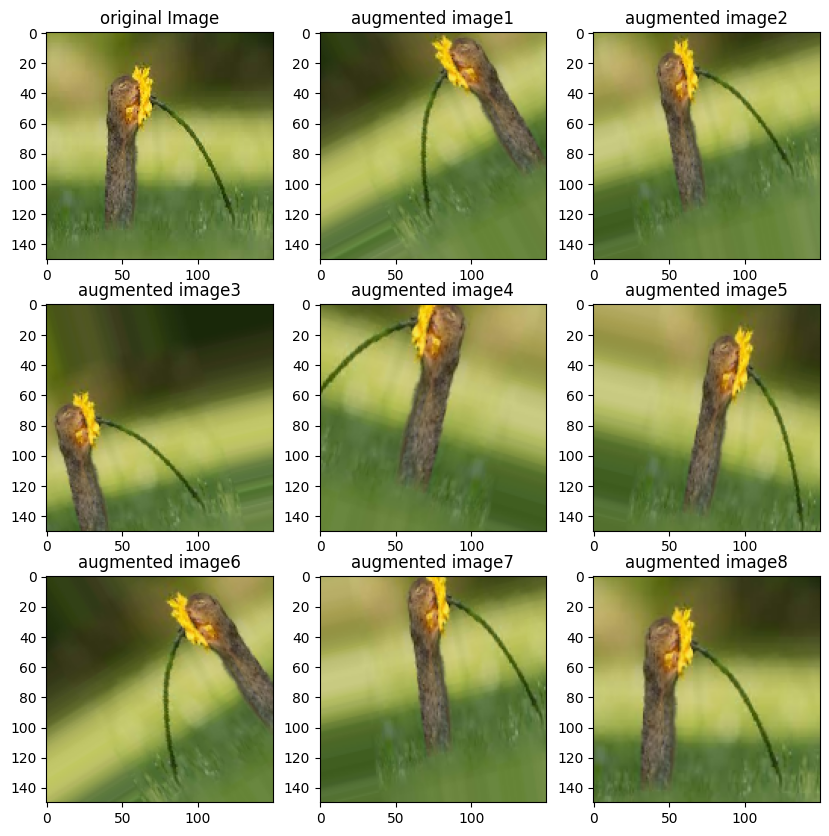

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_path="/content/squarrel.jpg"
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
datagen=ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#generate augment image
augmented_images=[]
for i in range(9):
  augmented_img=datagen.flow(x,batch_size=1)[0][0]
  augmented_images.append(augmented_img.astype(np.uint8))
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(image.array_to_img(x[0]))
plt.title("original Image")
for i in range(8):
  plt.subplot(3,3,i+2)
  plt.imshow(image.array_to_img(augmented_images[i]))
  plt.title(f'augmented image{i+1}')
plt.show()